# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импортируем библиотеки pandas, matplotlib и seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# откроем датасет либо с локально, либо из интернета
try:
    data = pd.read_csv('./datasets/mkrf_movies.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

#### Изучение общей информации ####

Применим "Универсальный набор аналитика данных" - `info()`, `hist()` и `discribe`.

In [3]:
# познакомимся с датасетом
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

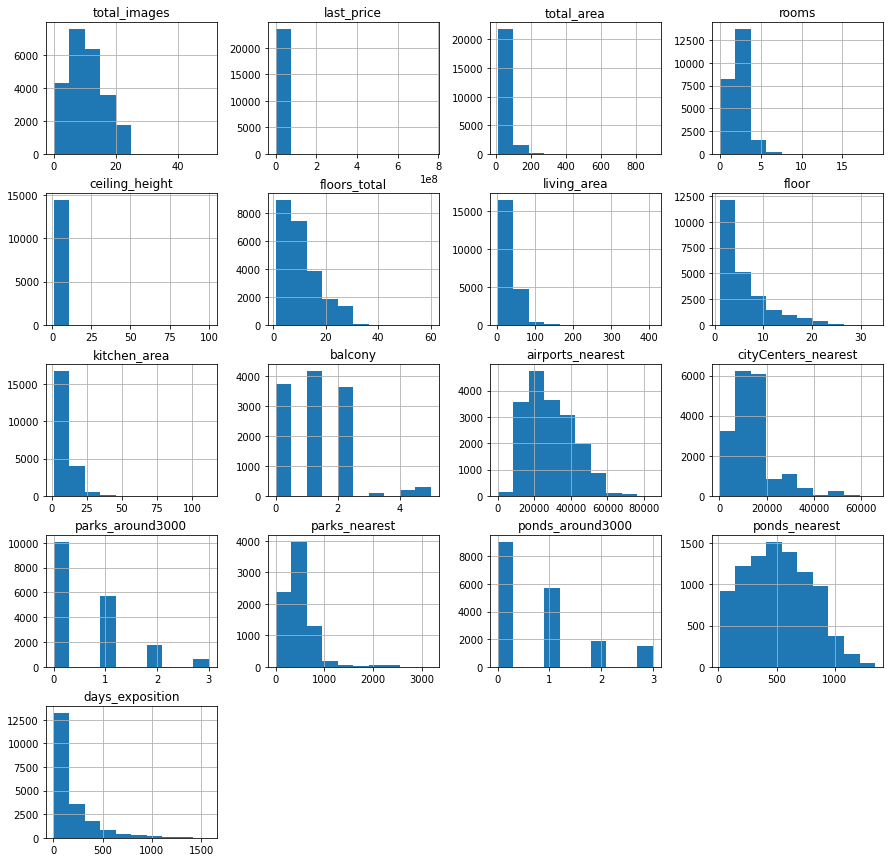

In [5]:
data.hist(figsize=(15, 15))
plt.show()

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Пока самым информативным методом является `info()` - тут все как на ладони: 
1. общая информация по датасету;
2. колонки с пропусками;
3. ошибки типов данных.

второе место по полезности  делят - `hist()` и `describe()`.  
`describe()` поможет ориентировочно прикинуть порядок значений, `hist()` - найти явные выбросы, однако из-за некорректных данных некоторые гистограммы на данном этапе неинформативны (например `'last_price'`), или вовсе "вредны" (`'ceiling_height'`). Приведем данные в порядок 

С данными познакомились, теперь можно приступить к первичной предобработке, после которой можно еще раз применим "Универсальный набор аналитика данных".

### Предобработка данных

In [7]:
# посмотрим общее количество пустых значений 
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


В некоторых колонках большое количество пропусков. Это колонки `ceiling_height`, `is_apartment`,`balcony`, `parks_nearest` и `ponds_nearest`. Пропуски могут помешать последующему анализу, поэтому важно их или починить, или удалить (там где возможно, конечно).

Начнем с удаления строк - дубликатов:

In [9]:
# выведем количество дубликатов строк
data.duplicated().sum()

0

Дубликатов нет, а значит `drop_duplicates()` нам сегодня не пригодится.

#### Заполнение пустых значений ####

Пустые значения в столбце `ceiling_height` не будет ошибкой заполнить медианным значением, потому как СНиП и ГОСТ говорят нам о допустимых номах в 2,4 - 2,7 м. Выбросы можно проигнорировать, т.к. этом столбце их минимальное значение.

In [10]:
# заполняем 'ceiling_height' медианным значением
data['ceiling_height'].fillna(value=data['ceiling_height'].median(), inplace=True)

Для столбца `floors_total` неуказано всего 86 строк. Чтобы не удалять строки на данном этапе, продублируем значение `floor` соответствующей строки в пустое значение `floors_total`.

In [11]:
# заполняем 'floors_total' значением из столбца 'floor'
data['floors_total'].fillna(value=data.loc[data['floors_total'].isna(), 'floor'], inplace=True)

Пустые значения столбца `is_apartment` заполняем False, т.к. основываясь на большом количестве пропусков можно предположить, что поле "Апартаменты" было необязательным для заполнения. Да и сам термин "Апартаменты" трактуется неоднозначно.

In [12]:
# заполняем 'is_apartment' значениями 'False'
data['is_apartment'].fillna(value=False, inplace=True)

*Интересное наблюдение:* после заполнение пропусков тип столбца поменялся из `object` в `bool` самостоятельно. Нам только на руку.

Схожая ситуация со столбцом `balcony` - не указав их количество имелось ввиду их отсутвие, так что смело меняем `NaN`  на `0`.

In [13]:
# заполняем 'balcony' значениями '0'
data['balcony'].fillna(value=0, inplace=True)

Столбцы `kitchen_area` и `living_area` - порядка 2300 объявлений не указали площадь кухни, и около 2000 объявлений не указали общую площадь квартиры. Наталкивает на мысль, что это квартиры с открытой планировкой или квартиры-студии. Ведь действительно  тяжело указать площадь кухни, когда она одно целое со всей квартирой.  
Пустые значения `kitchen_area` и `living_area` в строке можно заполнить половиной от площади данного объявления (все по честному - 50% кухне и 50% комнате).  
Если значения нет в каком-то одном из столбцов, то из площади `total_area` мы вычтем известную площадь `kitchen_area` или `living_area`, и запишем в `living_area` и `kitchen_area` соответственно.

In [14]:
# заполняем пустые значения 'kitchen_area' и 'living_area' половинным значением столбца 'total_area'
data['kitchen_area'].fillna(value=(data.loc[(data['kitchen_area'].isna()) &
                                            (data['living_area'].isna()), 'total_area'] / 2), inplace=True)
# дозаполним 'kitchen_area'
data['kitchen_area'].fillna(value=(data.loc[(data['kitchen_area'].isna()), 'total_area']-data['living_area']), inplace=True)
# дозаполним 'living_area'
data['living_area'].fillna(value=(data.loc[(data['living_area'].isna()), 'total_area']-data['kitchen_area']), inplace=True)

Для столбца `locality_name` - все пропуски в радиусе 10 км от центра Санкт-Петербурга заменим на `Санкт-Петербург` (географически это черта города). Оставшиеся строки  заменим на значение `не указано`.

In [15]:
# заполняем все пропуски в столбце 'locality_name' на 'Санкт-Петербург' в пределах 10 км от центра
data.loc[(data['locality_name'].isna()) & 
         (data['cityCenters_nearest'] < 10000), 'locality_name'] = 'Санкт-Петербург'
# дозаполним 'locality_name'
data['locality_name'].fillna(value='не указано', inplace=True)

Для того, чтобы заполнить географические пропуски (`parks_around3000`, `ponds_around3000`, `parks_nearest`, `ponds_nearest` `airports_nearest` и `cityCenters_nearest`) нужно сперва облагородить `locality_name`.

Посмотримм на уникальные значения этого столбца:

In [16]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Думаю не будет ошибкой откинуть лишние слова из названий населенных пунктов, такие как "село", "поселок" и т. п.

In [17]:
# т.к. методы выполняются последовательно, перво-наперво нужно поменять 'ё' на 'е'
data['locality_name'] = data['locality_name'].str.replace('ё','е').str.replace('имени ','') \
.str.replace('поселок ','').str.replace('село ','').str.replace('деревня ','').str.replace('городской ','') \
.str.replace('городского ','').str.replace('типа ','').str.replace('при железнодорожной станции ','') \
.str.replace('коттеджный ','').str.replace('садоводческое ','').str.replace('садовое ','') \
.str.replace('некоммерческое ','').str.replace('товарищество ','').str.replace('городской ','').str.replace('станции ','')

Убедимся, что у нас остались названия населенных пунктов, а все лишнее ушло.

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Для заполнения пропусков `airports_nearest` и `cityCenters_nearest` нужно посмотреть, какие из значений можно вылечить, а чем мы можем по
жертвовать:

In [19]:
# посчитаем количество объявлений в городах, где отсутствуют значения 'airports_nearest' и 'cityCenters_nearest'
missing_data_cities = (data.loc[(data['airports_nearest'].isna()) & 
         (data['cityCenters_nearest'].isna()), 'locality_name'].value_counts())
missing_data_cities

Мурино            588
Кудрово           472
Всеволожск        398
Гатчина           307
Выборг            237
                 ... 
Лаврики             1
Нижние Осельки      1
Семиозерье          1
Нижняя              1
Гладкое             1
Name: locality_name, Length: 287, dtype: int64

In [20]:
# посчитаем количество объявлений в городах-донорах данных 
donor_data_cities = (data.loc[(data['airports_nearest']>=0) & 
         (data['cityCenters_nearest']>=0), 'locality_name'].value_counts())
donor_data_cities

Санкт-Петербург    15661
Шушары               436
Пушкин               368
Колпино              337
Парголово            327
Петергоф             201
Сестрорецк           183
Красное Село         176
Ломоносов            132
Кронштадт             95
Металлострой          66
Стрельна              44
Павловск              38
Зеленогорск           24
Понтонный             20
не указано            16
Саперный               6
Молодежное             5
Репино                 4
Песочный               4
Лисий Нос              3
Мурино                 2
Александровская        2
Усть-Ижора             2
Щеглово                1
Белоостров             1
Петро-Славянка         1
Левашово               1
Name: locality_name, dtype: int64

In [21]:
# Соберем series в dataframe и посмотрим сколько городов-доноров получится и сколько объявлений можно спасти
result = pd.DataFrame({'missing_data_cities': missing_data_cities,
                     'donor_data_cities': donor_data_cities })
result.loc[(result['missing_data_cities']>=0) & (result['donor_data_cities']>=0), 'missing_data_cities']

Колпино              1.0
Красное Село         2.0
Кронштадт            1.0
Ломоносов            1.0
Мурино             588.0
Санкт-Петербург     61.0
Шушары               4.0
Щеглово             23.0
не указано           8.0
Name: missing_data_cities, dtype: float64

Семь населенных пунктов, в которых можно починить 628 объявлений. А это без малого 11% от общего числа пропусков в столбце.

Пустые значения заполним медианой по населенному пункту:

In [22]:
# заменим пропущенные значения для 'airports_nearest' 
data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'), inplace=True)
# заменим пропущенные значения для 'cityCenters_nearest' 
data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'), inplace=True)

Что могли, то спасли. В оставшихся населенных пунктах заполним пустоты 100 км. Это обусловлено географическим расположением - большая часть из этих городов находится более чем в 100 км от Санкт-Петербурга.

In [23]:
# заменим пропуски в 'airports_nearest' на 100 км
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = 100000
# заменим пропуски в 'cityCenters_nearest' на 100 км
data.loc[data['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = 100000

Для конкретных населенных пунктов будем считать наличие парков и прудов одинаковыми, для этого заполним медианными значениями пропуски в столбцах `parks_around3000`, `parks_nearest`, `ponds_around3000` и `ponds_nearest` по категориям из столбца `locality_name`.

In [24]:
# заполняем по населенному пункту 'parks_around3000'
data['parks_around3000'].fillna(data.groupby('locality_name')['parks_around3000'].transform('median'), inplace=True)

# заполняем по населенному пункту 'parks_nearest'
data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('median'), inplace=True)

# заполняем по населенному пункту 'ponds_around3000'
data['ponds_around3000'].fillna(data.groupby('locality_name')['ponds_around3000'].transform('median'), inplace=True)

# заполняем по населенному пункту 'ponds_nearest'
data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('median'), inplace=True)

Оставшиеся пропуски для `parks_around3000` и `ponds_around3000` заменим на 5 и будем считать их выбивающимися значениями.

Пропущенные значения для `parks_nearest` и `ponds_nearest` заменим на 5 км и будем считать их выбивающимися значениями.

In [25]:
# заполняем 'parks_around3000'
data['parks_around3000'].fillna(value=5, inplace=True)

# заполняем 'ponds_around3000'
data['ponds_around3000'].fillna(value=5, inplace=True)

# заполняем 'parks_nearest'
data['parks_nearest'].fillna(value=5000, inplace=True)

# заполняем 'ponds_nearest'
data['ponds_nearest'].fillna(value=5000, inplace=True)

Последним столбцом с пропусками является `days_exposition`. Судя по всему эти объявления все еще актуальны, а в этом будет лучшим решением оставить все как есть.

**С первичной предобработкой покончено!**

Однако убедимся, что все пропуски устранены:

In [26]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

Теперь можно перейти к изменению типов данных и к устранению аномальных значений.

#### Изменение типов данных ####

Во время предварительного ознакомления с данными было видно, что некоторые столбцы имеют неверный формат. Для дальнейшей  корректной работы тип данных должен соответствовать самим данным. Рассмотрим подробнее столбцы:
1. `first_day_exposition` - `object`, дата и время должны быть `datetime64`
2. `floors_total` - `float64`, количество этажей в доме - целое число `int64`
3. `is_apartment` - `object`, должен быть булев тип `bool`
4. `balcony` - `float64`, число балконов - целое число `int64`
5. `airports_nearest` - `float64`, расстояние до аэропорта - целое число `int64`
6. `cityCenters_nearest` - `float64`, расстояние до центра города - целое число `int64`
7. `parks_around3000` - `float64`, количество парков - целое число `int64`
8. `parks_nearest` - `float64`, расстояние до ближайшего парка - целое число `int64`
9. `ponds_around3000` - `float64`, число прудов - целое число `int64`
10. `ponds_nearest` - `float64`, расстояние до ближайшего водоема - целое число `int64`
11. `days_exposition` - `float64`, количество дней - целое число `int64`

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [28]:
# преобразуем дату и время
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# преобразуем 'float64' в 'int64' циклом
columns_list = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 
                'parks_around3000', 'parks_nearest', 'ponds_around3000', 
                'ponds_nearest']
for column in columns_list:
    data[column] = data[column].astype('int64', errors='ignore')
    
# столбец 'days_exposition' необходимо сначала округлить 
data['days_exposition'] = data['days_exposition'].round().astype('Int64')

Убедимся что все прошло гладко:

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Результат устраивает полностью, проблем не наблюдается.

#### Устранение редких и выбивающихся значений (аномалий) ####

Наибольший интерес для нас представляют следующие столбцы:

1. `last_price`  
2. `total_area`  
3. `rooms`  
4. `ceiling_height`  
5. `floors_total`  
6. `living_area`
7. `kitchen_area`

Начнем с `last_price`.

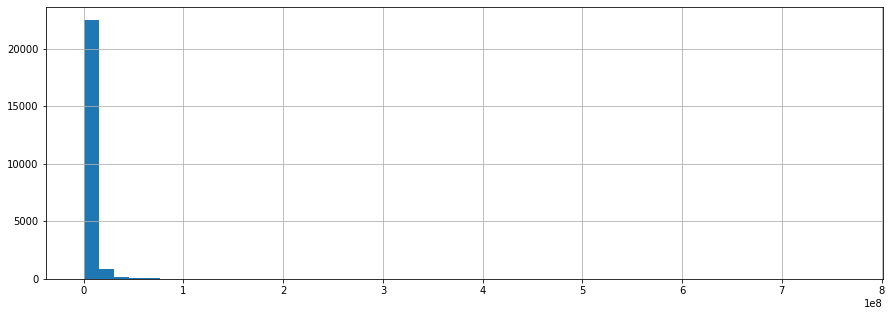

In [30]:
data['last_price'].hist(bins=50, figsize=(15, 5))
plt.show()

 Можно заметить, что в столбце `last_price` есть значения более 100 миллионов.

In [31]:
# Посчитаем объявления с ценой более 100 миллионов
(data['last_price'] > 100000000).sum()

37

Всего 37 записей. Удалим их и посмотрим какой вид приобретёт гистограмма распределения. 

In [32]:
# удаляем строки с ценой более 100 миллионов
data = data.loc[data['last_price'] < 100000000]

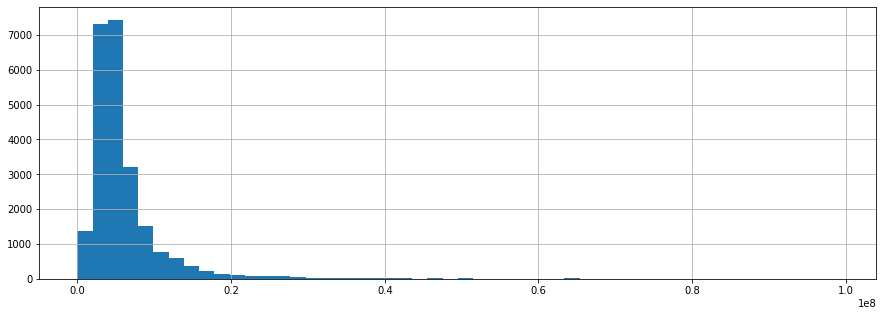

In [33]:
data['last_price'].hist(bins=50, figsize=(15, 5))
plt.show()

Уже лучше, но не сильно помогло. Все еще много значений, лежащих за общей выборкой.  
Для автоматизации соберем функцию `box_plot()`.
Она поможет построить диаграмму размаха и посчитать выбросы.

In [34]:
def box_plot(column):
    # выводим 'ящик с усами'
    data.boxplot(column=column)
    plt.show()
    
    # считаем квартили и межквартильный размах
    q3 = data[column].quantile(0.75)
    q1 = data[column].quantile(0.25)
    max_lim = q3 + 1.5 * (q3 - q1)
    
    # считаем выбросы
    display((data[column] > max_lim).sum())
    return

Вызовем функцию `box_plot()` для нашей колонки со стоимостью.

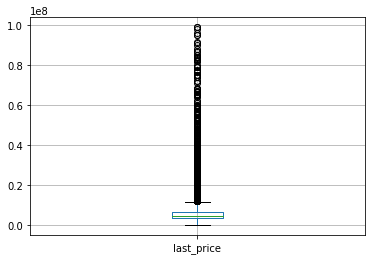

2049

In [35]:
# применим 'box_plot' к столбцу 'last_price'
box_plot('last_price')

Всё ещё огромное количество выбросов - 2049 объявлений, но удалять такое количество грешно. 

Пока переключимся на следующий столбец, применим `box_plot()` к `total_area`.

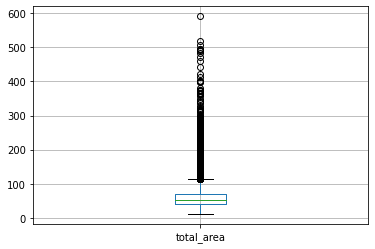

1237

In [36]:
# применим 'box_plot()' к 'total_area'
box_plot('total_area')

И тут 1237 выброса. Взглянем на график еще раз.

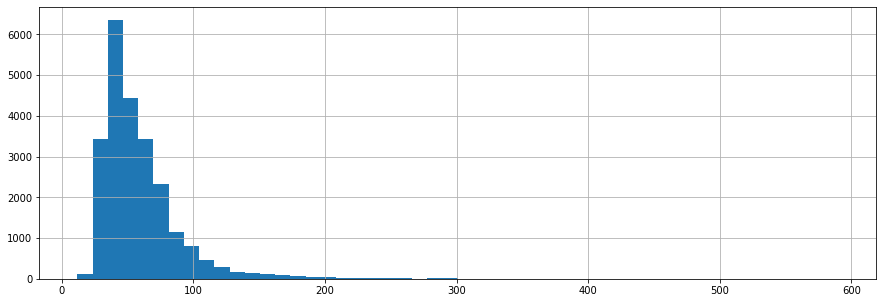

In [37]:
data['total_area'].hist(bins=50, figsize=(15, 5))
plt.show()

Видно что значения с площадью, больше 300 м2 явно выделяются на фоне остальных. Посчитаем сколько таких значений и если их будет немного, удалим эти записи и построим гистограмму распределения.

In [38]:
# количество записей с общей площадью больше 300 м2
(data['total_area'] > 300).sum()

45

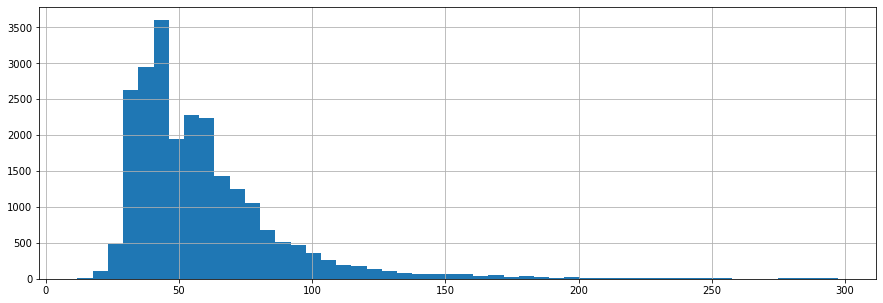

In [39]:
# удалим 45 объявлений, где 'total_area' больше 300 м2
data = data.loc[data['total_area'] < 300]
# построим гистограмму распределения для столбца 'total_area'
data['total_area'].hist(bins=50, figsize=(15, 5))
plt.show()

Теперь `total_area` выглядит лучше.

Перейдем к столбцу `rooms`. 

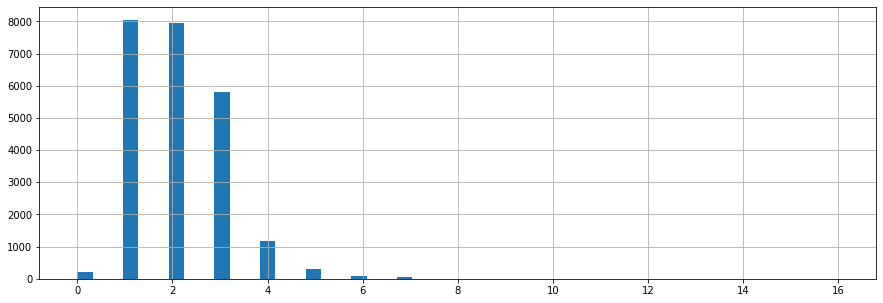

In [40]:
data['rooms'].hist(bins=50, figsize=(15, 5))
plt.show()

In [41]:
# посмотрим квартиры с 8 и более комнатами
data.loc[data['rooms'] >= 8, ['total_area', 'rooms', 'living_area']].sort_values(by='rooms', ascending=False)

,total_area,rooms,living_area
18848,270.0,16,180.0
20829,245.4,14,168.3
9688,194.1,11,129.0
648,183.7,11,138.8
18119,216.1,10,161.4
4149,272.6,10,145.9
18891,290.0,10,189.4
8860,235.0,9,117.5
13019,249.9,9,157.0
20791,250.0,9,160.6


16 комнат - прям-таки лабиринт, а не квартира. Таких "элитных" квартир всего 18, и откровенно говоря они больше похожи на общежитие.

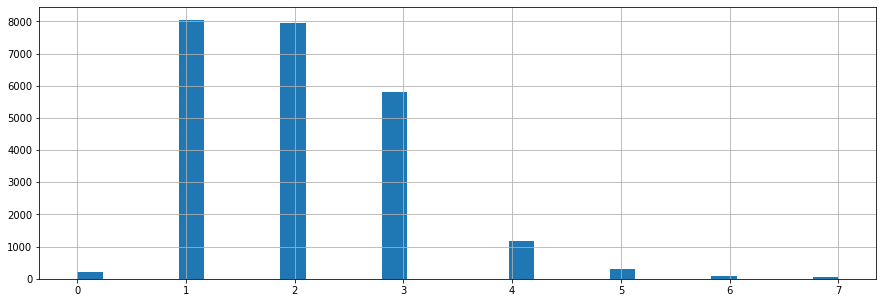

In [42]:
# удалим объявления, где 'rooms' больше 8
data = data.loc[data['rooms'] < 8]
# построим гистограмму распределения для столбца 'rooms'
data['rooms'].hist(bins=30, figsize=(15, 5))
plt.show()

Теперь `rooms` выглядит лучше.

Перейдем к столбцу `ceiling_height`. 

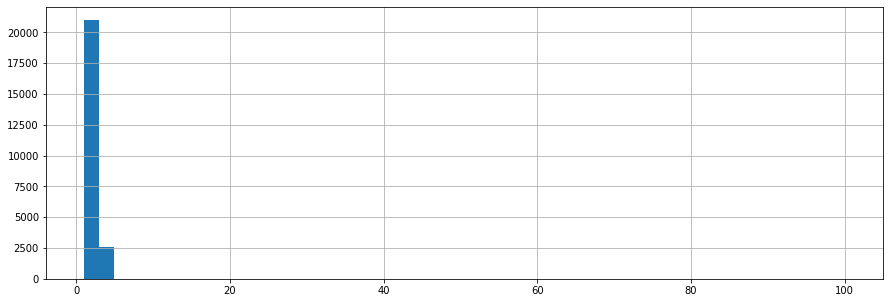

In [43]:
data['ceiling_height'].hist(bins=50, figsize=(15, 5))
plt.show()

In [44]:
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'].sort_values(ascending=False)

22869    100.0
22336     32.0
3148      32.0
21377     27.5
22938     27.0
17857     27.0
4876      27.0
5246      27.0
5807      27.0
21824     27.0
10773     27.0
20478     27.0
5669      26.0
18545     25.0
355       25.0
11285     25.0
9379      25.0
6246      25.0
4643      25.0
14382     25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
Name: ceiling_height, dtype: float64

Наблюдаем явный выброс со значением в 100 метров. Логично предположить, что потолки 32 м, 27 м и 25 м на самом деле 3.2 м, 2.7 м и 2.5 м соответственно. Исправим это недоразумение, и для красивых данных потолки более 5 метров (СНиП называет их "вторым светом") и менее 2.4 метров (СНиП называет их "недопустимыми") заменим на медианные.

In [45]:
# уменьшим высоту потолков
data.loc[(data['ceiling_height'] >= 21) & 
         (data['ceiling_height'] <= 32), 'ceiling_height'] /= 10
# исправим остальные
data.loc[(data['ceiling_height'] <= 2.4) | 
         (data['ceiling_height'] >= 5), 'ceiling_height'] = data['ceiling_height'].median()
# проверим результат
data['ceiling_height'].describe()

count    23597.000000
mean         2.694673
std          0.209819
min          2.450000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

В среднем потолок получился 2.69 м - максимально приближено к золотому эталону в 2.7 м.

Перейдем к `floors_total`.

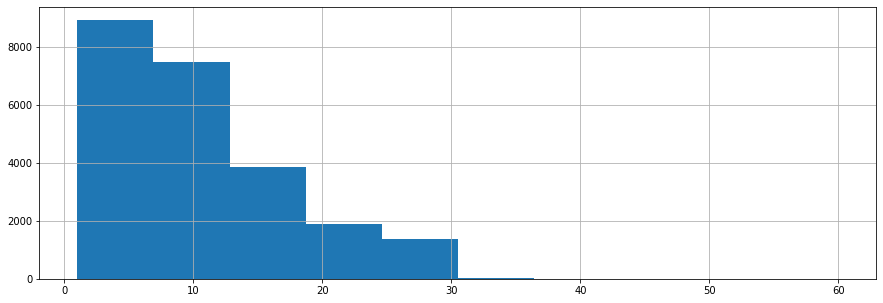

In [46]:
data['floors_total'].hist(bins=10, figsize=(15, 5))
plt.show()

In [47]:
# удалим данные с домами выше 35 этажей
data = data.loc[data['floors_total'] <= 35]

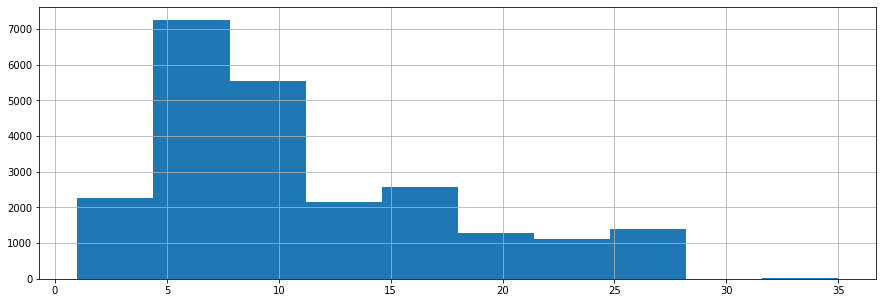

In [48]:
# проверим результат
data['floors_total'].hist(bins=10, figsize=(15, 5))
plt.show()

С `floors_total` мы закончили.

Переходим к `living_area`. Выведем на экран записи с жилой площадью менее 10 м2.

In [49]:
# выведем объявления, с жилой площадью меньше 10 м2
data.loc[data['living_area'] <= 10, ['total_area', 'rooms', 'living_area']].sort_values(by='total_area', ascending=False)

,total_area,rooms,living_area
23574,139.0,3,3.0
21943,77.6,4,5.4
2309,62.4,2,8.4
8325,52.0,2,9.0
1326,52.0,2,9.0
...,...,...,...
19558,13.2,1,6.6
19807,13.0,1,10.0
19546,13.0,1,6.5
17961,13.0,1,6.5


69 объявлений (*nice...*) в которых можно увидеть  3-х комнатная квартиру с жилой площадью 3 м2 из 139 м2 жилой площади.
К моему ужасу в России нормой считается площадь с 7 м2 на человека. Уберем все что меньше.

In [50]:
# срежем квартиры с жилой площадью меньше 7 м2
data = data.loc[data['living_area'] >= 7]

Посмотрим на "ящик с усами".

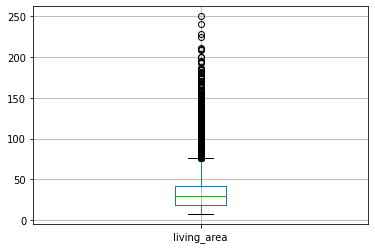

821

In [51]:
# построим диаграму размаха 'total_area'
box_plot('living_area')

удалять 821 строку нецелесообразно, а вот значения больше 200 можно отбросить - они явно выбиваются от всех остальных.

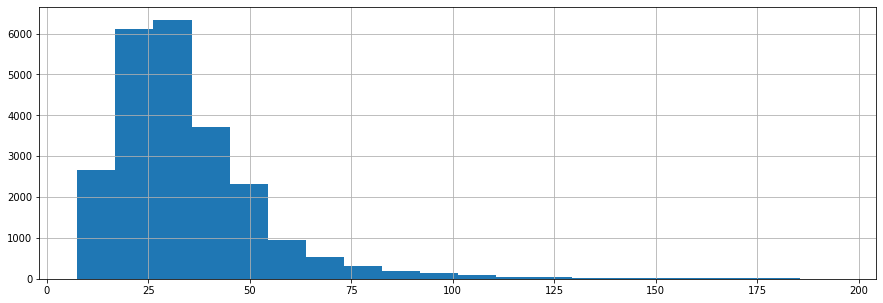

In [52]:
# оставим объявления с площадью менее 200 м2
data = data.loc[data['living_area'] < 200]
# посмотрим на результат
data['living_area'].hist(bins=20, figsize=(15, 5))
plt.show()

с `living_area` покончено.

Рассмотрим столбец `kitchen_area`, минимальные размеры нет смысла оценивать, так как ранее мы видели и даже сами внесли нулевые значения площади для квартир-студий, а вот выбивающиеся значения за верхние пределы надо оценить.

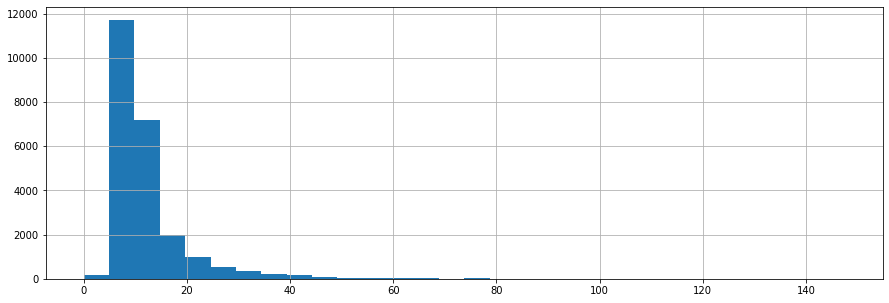

In [53]:
data['kitchen_area'].hist(bins=30, figsize=(15, 5))
plt.show()

In [54]:
# посчитаем объявления с площадью кухни более или равной 70 м2
(data['kitchen_area'] >= 70).sum()

58

58 объявлений можно удалить.

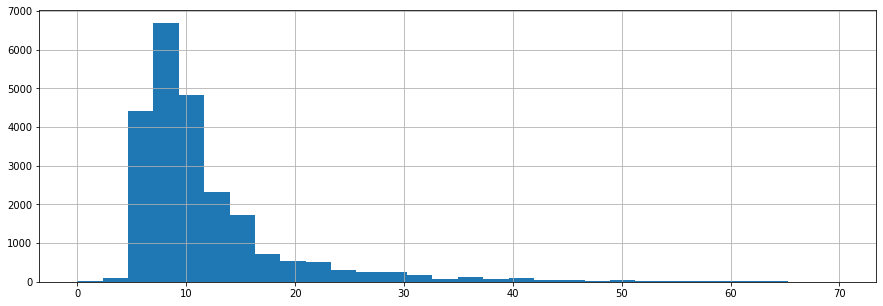

In [55]:
# убираем объявления
data = data.loc[data['kitchen_area'] < 70]
# смотрим на результат
data['kitchen_area'].hist(bins=30, figsize=(15, 5))
plt.show()

`kitchen_area` причесана, можно взглянуть на итоговую информацию по данным:

In [56]:
# итоговый результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23513 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23513 non-null  int64         
 1   last_price            23513 non-null  int64         
 2   total_area            23513 non-null  float64       
 3   first_day_exposition  23513 non-null  datetime64[ns]
 4   rooms                 23513 non-null  int64         
 5   ceiling_height        23513 non-null  float64       
 6   floors_total          23513 non-null  int64         
 7   living_area           23513 non-null  float64       
 8   floor                 23513 non-null  int64         
 9   is_apartment          23513 non-null  bool          
 10  studio                23513 non-null  bool          
 11  open_plan             23513 non-null  bool          
 12  kitchen_area          23513 non-null  float64       
 13  balcony         

#### Выводы по предобработке данных

Было удалено 186 объявлений с аномальными значениями, что составляет 0.78% от исходных данных. Исходный датасет оказался весьма неплох, значений осталось много, есть с чем работать дальше.

Не забываем про столбец `days_exposition`, пока с ним ничего не поделать.

### Добавление новых столбцов ###

Добавим столбец с ценой за 1 м2:

In [57]:
#цена за 1 м2
data['one_meter_cost'] = data['last_price'] / data['total_area']

Добавим столбец с номером дня недели:

In [58]:
# номер дня недели
data['day_of_week'] = data['first_day_exposition'].dt.weekday

Добавим столбец с месяцем публикации:

In [59]:
# месяц публикации
data['month_exposition'] = data['first_day_exposition'].dt.month

Добавим столбец с годом публикации:

In [60]:
# год публикации
data['year_expostition'] = data['first_day_exposition'].dt.year

Добавим столбец с типом этажа:

In [61]:
# используем функцию
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [62]:
# тип этажа
data['apartment_type'] = data.apply(floor_type, axis=1)

Добавим столбец с расстоянием от центра в километрах и округлим до целых значений:

In [63]:
# расстояние от центра в километрах
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).astype('int64', errors='ignore')

Посмотрим все ли корректно создалось:

In [64]:
data.loc[:,'one_meter_cost':'cityCenters_nearest_km'].head()

,one_meter_cost,day_of_week,month_exposition,year_expostition,apartment_type,cityCenters_nearest_km
0,120370.370370,3,3,2019,другой,16
1,82920.792079,1,12,2018,первый,18
2,92785.714286,3,8,2015,другой,13
4,100000.000000,1,6,2018,другой,8
5,95065.789474,0,9,2018,другой,100


Выглядит прилично, можно переходить к анализу данных.

### Исследовательский анализ данных ###

#### Изучение параметров объектов

Cоздадим функцию `column_info()` по аналогии с `box_plot()`, только вместо "ящика с усами" будем строить гистограмму распределения.

In [65]:
def column_info(column, bins, plot_range, title, xlabel, ylabel):
    # построим гистограмму распределения
    plt.hist(data[column], bins=bins, range=plot_range)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    # посмотрим на пиковые значения
    display(data[column].value_counts().head())
    
    # выведем числовое описание данных
    display(data[column].describe())
    return


##### Общая площадь

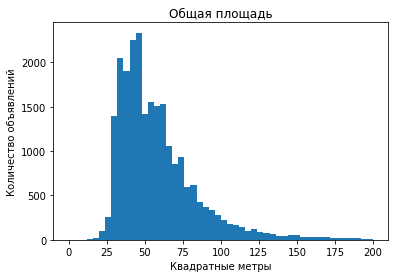

45.0    419
42.0    383
60.0    347
44.0    345
31.0    345
Name: total_area, dtype: int64

count    23513.000000
mean        58.777895
std         28.717336
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        297.500000
Name: total_area, dtype: float64

In [66]:
column_info('total_area', bins=50, plot_range=(0, 200), 
            title='Общая площадь', xlabel='Квадратные метры', ylabel='Количество объявлений')

Больше всего квартир с площадью в 45 м2, а медиана - 52 м2. За большими квартирами особо не гонятся.

##### Жилая площадь

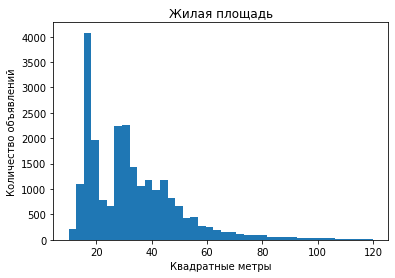

18.0    902
17.0    686
30.0    626
20.0    511
16.0    500
Name: living_area, dtype: int64

count    23513.000000
mean        33.740962
std         19.021630
min          7.500000
25%         18.900000
50%         30.000000
75%         42.000000
max        195.000000
Name: living_area, dtype: float64

In [67]:
column_info('living_area', bins=40, plot_range=(10, 120), 
            title='Жилая площадь', xlabel='Квадратные метры', ylabel='Количество объявлений')

Интересная гистограмма: 17-18 м2 и 30 м2 в топе, а между ними провал. Возможно 17-18 м2 это объявления по продаже комнат. А 30 м2 уже больше похожа на маленькую, но самостоятельную квартиру (все-таки для одной комнаты 30 м2 многовато).  

##### Площадь кухни

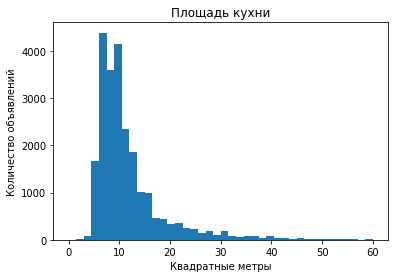

6.0     1310
10.0    1284
8.0     1132
9.0     1122
7.0     1084
Name: kitchen_area, dtype: int64

count    23513.000000
mean        11.701142
std          7.460869
min          0.000000
25%          7.200000
50%          9.800000
75%         13.000000
max         69.900000
Name: kitchen_area, dtype: float64

In [68]:
column_info('kitchen_area', bins=40, plot_range=(0, 60), 
            title='Площадь кухни', xlabel='Квадратные метры', ylabel='Количество объявлений')

Наиболее распространённая "Хрущевская" кухонька в 6 м2. Медиана больше похожа на современные планировки с кухнями в 10 м2. Можно заметить кухни в 0 м2 - скорее всего это студии, в которых кухня совмещена с жилой площадью.

##### Цена объекта

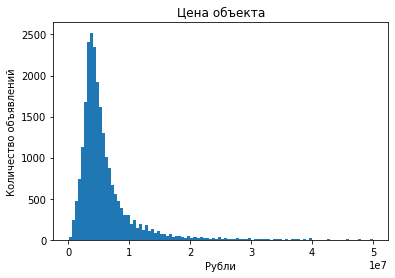

4500000    342
3500000    291
4300000    260
4000000    260
4200000    259
Name: last_price, dtype: int64

count    2.351300e+04
mean     6.068081e+06
std      5.679262e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      9.500000e+07
Name: last_price, dtype: float64

In [69]:
column_info('last_price', bins=100, plot_range=(100000, 50000000), 
            title='Цена объекта', xlabel='Рубли', ylabel='Количество объявлений')

Распределение Пуассона прям как по учебнику! Пик в 4.5 млн. рублей почти попадает в медиану с 4.6 млн. рублей.

##### Количество комнат

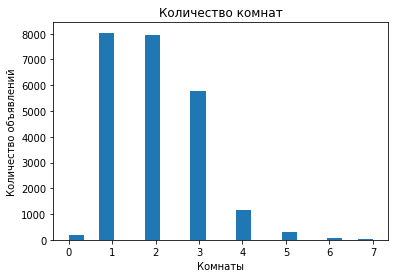

1    8038
2    7930
3    5785
4    1148
5     291
Name: rooms, dtype: int64

count    23513.000000
mean         2.045804
std          1.013722
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [70]:
column_info('rooms', bins=20, plot_range=(0, 7), 
            title='Количество комнат', xlabel='Комнаты', ylabel='Количество объявлений')

Ожидаемый результат - однокомнатные и двухкомнатные в лидерах с незначительным перевесом в сторону первых. "Трешки" в роли догоняющих, а четырехкомнатные - уже редкость.

##### Высота потолков

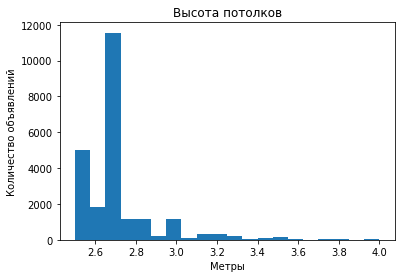

2.65    9853
2.50    3518
2.60    1645
2.70    1579
3.00    1092
Name: ceiling_height, dtype: int64

count    23513.000000
mean         2.694086
std          0.208848
min          2.450000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

In [71]:
column_info('ceiling_height', bins=20, plot_range=(2.5, 4), 
            title='Высота потолков', xlabel='Метры', ylabel='Количество объявлений')

Санкт-Петербург уважает строительные нормы и государственные стандарты - нарушений нет совсем.

##### Этаж квартиры

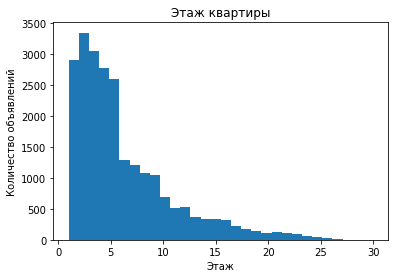

2    3342
3    3045
1    2900
4    2776
5    2596
Name: floor, dtype: int64

count    23513.000000
mean         5.895037
std          4.885726
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [72]:
column_info('floor', bins=30, plot_range=(1, 30), 
            title='Этаж квартиры', xlabel='Этаж', ylabel='Количество объявлений')

Санкт - Петербург - город низкой застройки, подавляющее большинство объявлений до 5 этажей.

##### Тип квартиры

Для типа квартиры гистограмму построим вручную:

другой       17245
последний     3368
первый        2900
Name: apartment_type, dtype: int64

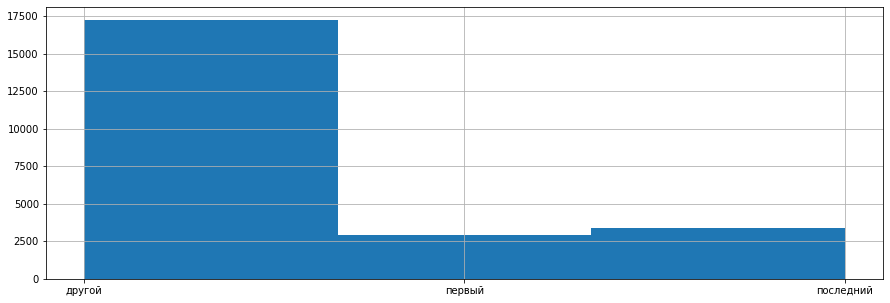

In [73]:
# гистограмма распределения
data['apartment_type'].hist(bins=3, figsize=(15, 5))
# количество значений
display(data['apartment_type'].value_counts())

Группа "Кино" предсказала поведение для этой гистограммы - первый и последний этажи нам предлагают значительно реже.

##### Общее количество этажей в доме

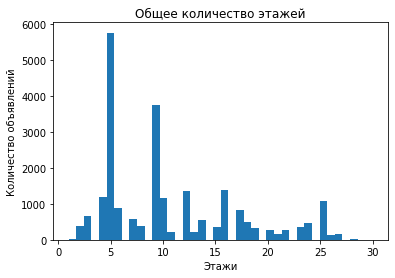

5     5757
9     3752
16    1371
12    1363
4     1192
Name: floors_total, dtype: int64

count    23513.000000
mean        10.687705
std          6.581244
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_total, dtype: float64

In [74]:
column_info('floors_total', bins=40, plot_range=(1, 30), 
            title='Общее количество этажей', xlabel='Этажи', ylabel='Количество объявлений')

Преобладающее количество типовой застройки - пятиэтажные "Хрущевки", 9вяти-этажки. Интересно, что одноэтажных домов так мало, частный сектор плохо развит.

##### Расстояние до ближайшего аэропорта

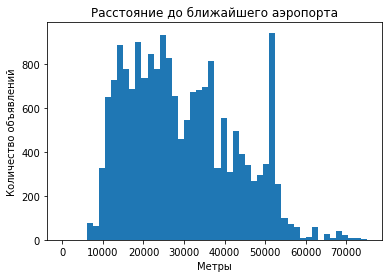

100000    4827
51553      589
26736       77
37434       61
21928       32
Name: airports_nearest, dtype: int64

count     23513.000000
mean      44021.541956
std       30753.604651
min           0.000000
25%       21137.000000
50%       33522.000000
75%       51553.000000
max      100000.000000
Name: airports_nearest, dtype: float64

In [75]:
column_info('airports_nearest', bins=50, plot_range=(0, 75000), 
            title='Расстояние до ближайшего аэропорта', xlabel='Метры', ylabel='Количество объявлений')

В ходе предобработки данных мы заполнили пустые значения по столбцу `airports_nearest` значением в 100000 метров. Но для второго места в нашем списке очень много записей, нужно проверить не закралась ли ошибка:

In [76]:
# посмотрим, что это за населенный пункт 
data.loc[data['airports_nearest'] == 51553, 'locality_name'].unique()

array(['Мурино'], dtype=object)

`airports_nearest` для Мурино мы заполняли по аналогичному значению из заполненной строки, отсюда и такое количество объявлений. Наша предобработка не сильно искажает данные, ведь подавляющее большенство объявлений - не ближе чем 21137 м от Пулково.

##### Расстояние до центра города

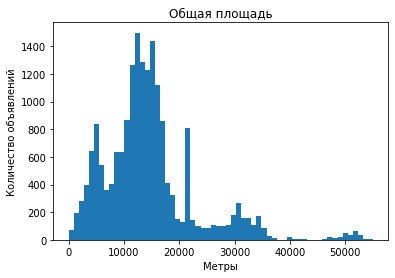

100000    4827
21888      589
8460        61
12241       59
17369       32
Name: cityCenters_nearest, dtype: int64

count     23513.000000
mean      32071.857951
std       35362.686452
min         181.000000
25%       11004.000000
50%       14998.000000
75%       31135.000000
max      100000.000000
Name: cityCenters_nearest, dtype: float64

In [77]:
column_info('cityCenters_nearest', bins=60, plot_range=(0, 55000), 
            title='Общая площадь', xlabel='Метры', ylabel='Количество объявлений')

Подавляющая часть объявлений - Ленинградская область. Судя по цифрам много объявлений из ближайшего подпетербуржья.

##### Расстояние до ближайшего парка

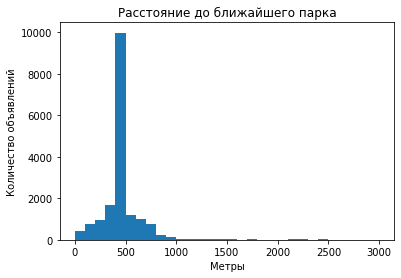

460     8411
5000    6018
733      323
393      218
399      165
Name: parks_nearest, dtype: int64

count    23513.000000
mean      1634.006592
std       1984.613539
min          1.000000
25%        460.000000
50%        460.000000
75%       5000.000000
max       5000.000000
Name: parks_nearest, dtype: float64

In [78]:
column_info('parks_nearest', bins=30, plot_range=(0, 3000), 
            title='Расстояние до ближайшего парка', xlabel='Метры', ylabel='Количество объявлений')

Санкт-Петербург - зеленый город! Подавляющее большинство объявлений находятся в пределах 500 метров от парка. Значение в 5000 метров искуственно созданный (нами) выброс.

##### День и месяц публикации объявления

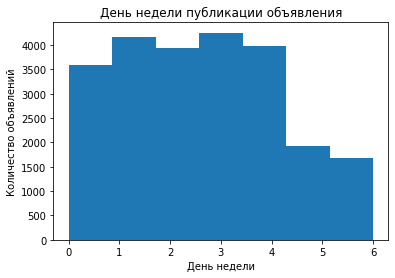

3    4254
1    4156
4    3972
2    3937
0    3589
Name: day_of_week, dtype: int64

count    23513.000000
mean         2.568537
std          1.789846
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week, dtype: float64

In [79]:
# день публикации
column_info('day_of_week', bins=7, plot_range=(0, 6), 
            title='День недели публикации объявления', xlabel='День недели', ylabel='Количество объявлений')

Большая часть объявлений - наверняка дело рук риелторов. В будни клепают объявления, а в выходные отдыхают. Интересно было бы взглянуть на столбец "частное объявление" или "от собственника" (если такие данные вообще есть) и уточнить мою гипотезу.

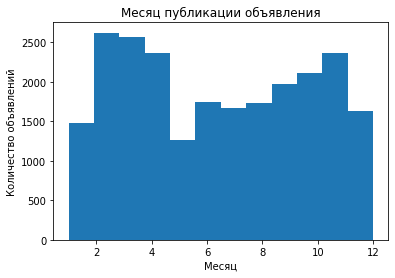

2     2621
3     2570
4     2361
11    2358
10    2110
Name: month_exposition, dtype: int64

count    23513.000000
mean         6.400714
std          3.491157
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

In [80]:
#месяц публикации
column_info('month_exposition', bins=12, plot_range=(1, 12), 
            title='Месяц публикации объявления', xlabel='Месяц', ylabel='Количество объявлений')

 В январе и мае много празников и выходных дней. Летние месяцы - традиционно пора отпусков. Декабрь - тяжелый месяц, тут и конец года с закрытием разного рода отчетностей, и подготовка к долгим январским каникулам. Гипотеза с риелторами только укрепляется.

#### Скорость продажи квартир

Подпункт 2.4 любезно напоминает нам о необходимости забыть пропуски в столбце `days_exposition`

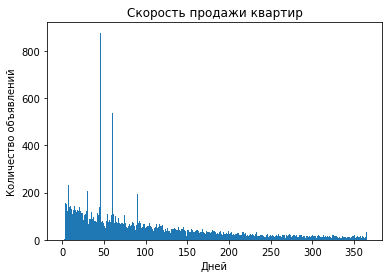

45    878
60    538
7     232
30    208
90    193
Name: days_exposition, dtype: Int64

count    20370.000000
mean       180.184978
std        218.946992
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [81]:
# построим гистограмму откинув пустые значения
plt.hist(data.loc[data['days_exposition'] != False, 'days_exposition'], bins=365, range=(0,365))
plt.title('Скорость продажи квартир')
plt.xlabel('Дней')
plt.ylabel('Количество объявлений')
plt.show()
# посчитаем количество значений в порядке убвыния
display(data['days_exposition'].value_counts().head())
# получим числовое описание о днях размещения
display(data['days_exposition'].describe())

Медиана продажи квартир - будет выступать критерием обычной скорости продажи. Все что меньше первого квартиля - быстрая продажа, а все что больше третьего квартиля - долгая продажа. Из интересного - кратные времена объявлений во первых строках. Возможно это рекламные объявления (продажа продвижения объявления на неделю, месяц, полтора, два или три).

#### Факторы  влияния на общую стоимость объекта

Построим тепловую карту корреляций.

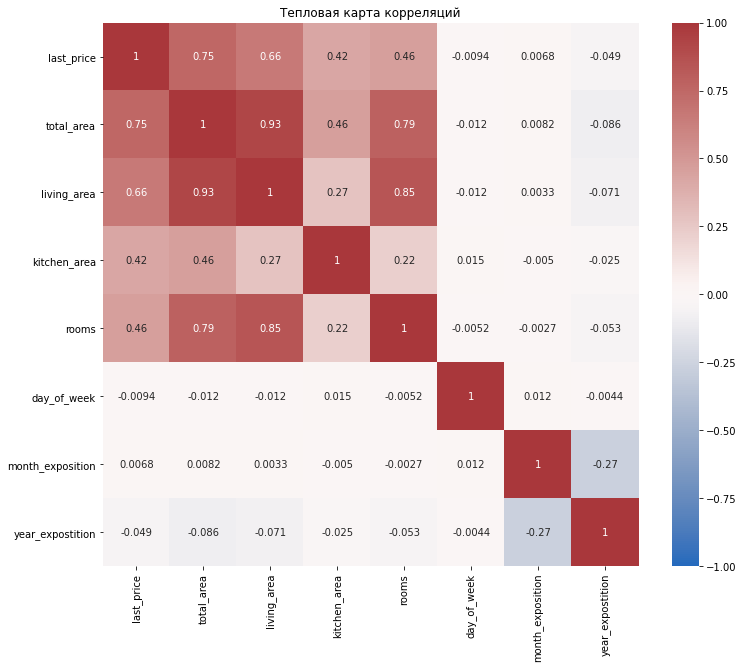

In [82]:
# построим тепловую карту по интересующим нас столбцам
plt.subplots(figsize=(12,10))
heatmap = sns.heatmap(data[['last_price', 'total_area', 'living_area', 
                'kitchen_area', 'rooms', 'apartment_type', 
                'day_of_week', 'month_exposition', 'year_expostition']].corr(), vmin=-1, vmax=1, annot=True, cmap="vlag")
heatmap.set_title('Тепловая карта корреляций')
plt.show()

Видим, что на `last_price` больше всего оказывает влияние `total_area`. В свою очередь `total_area` влияет на `living_area` , а `living_area` на `rooms`. И только `kitchen_area` не сильно влияет на интересующие нас столбцы. Корреляция `day_of_week`, `month_exposition` и `month_exposition` близка к нулю.

Посмотрим на корреляцию поближе:

##### Общая площадь

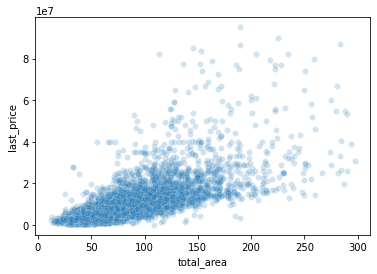

In [83]:
sns.scatterplot(data=data, x='total_area', y='last_price', alpha=0.2)
plt.show()

Ярко выражена зависимость цены от площади, особенно в значениях до 150 м2.

##### Жилая площадь

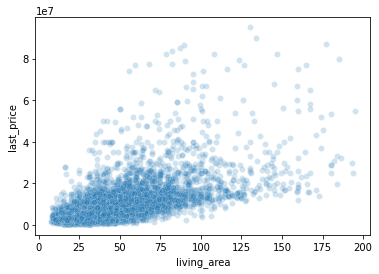

In [84]:
sns.scatterplot(data=data, x='living_area', y='last_price', alpha=0.2)
plt.show()

Аналогично `total_area`, только поменялся порядок значений.

##### Площадь кухни

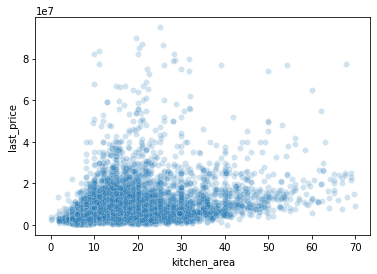

In [85]:
sns.scatterplot(data=data, x='kitchen_area', y='last_price', alpha=0.2)
plt.show()

С `kitchen_area` уже не такая явная корреляция: 10 м2 или 30 м2 для 15 млн. рублей не столь важны.

##### Количество комнат

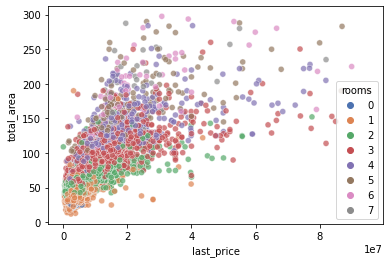

In [86]:
sns.scatterplot(data=data, x='last_price', y='total_area', alpha=0.7, hue='rooms', palette="deep")
plt.show()

Число комнат сильно зависят от `total_area`.

##### Тип этажа

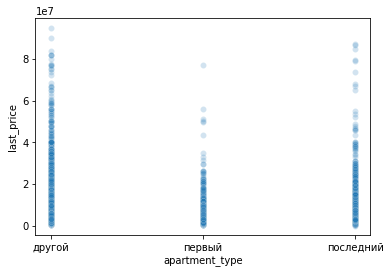

In [87]:
sns.scatterplot(data=data, x='apartment_type', y='last_price', alpha=0.2)
plt.show()

Первый этаж - сырость из подвала, последний - сырость с чердака. Я в эту гипотезу не верю, а покупатель похоже что верит.

##### Дата размещения

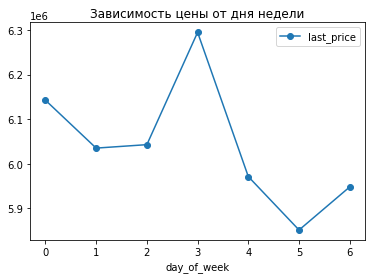

In [88]:
data.pivot_table(index='day_of_week', 
                 values=['last_price']).plot(style='o-', title='Зависимость цены от дня недели')
plt.show()

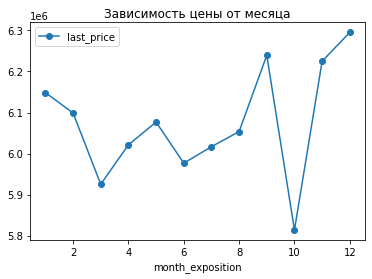

In [89]:
data.pivot_table(index='month_exposition', 
                 values=['last_price']).plot(style='o-', title='Зависимость цены от месяца')
plt.show()

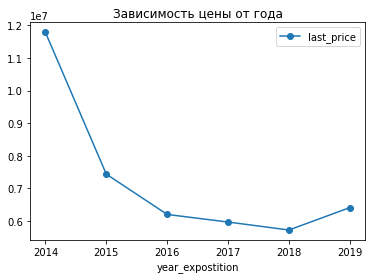

In [90]:
data.pivot_table(index='year_expostition', 
                 values=['last_price']).plot(style='o-', title='Зависимость цены от года')
plt.show()

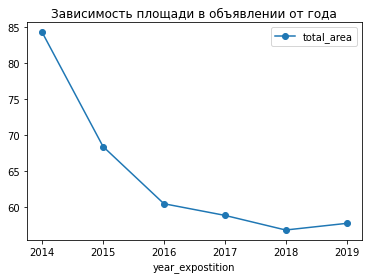

In [91]:
data.pivot_table(index='year_expostition', 
                 values=['total_area']).plot(style='o-', title='Зависимость площади в объявлении от года')
plt.show()

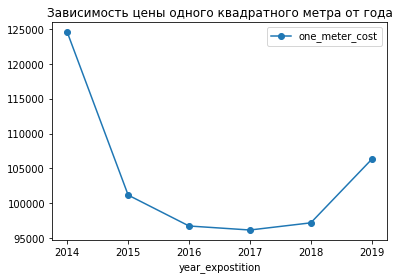

In [92]:
data.pivot_table(index='year_expostition', 
                 values=['one_meter_cost']).plot(style='o-', title='Зависимость цены одного квадратного метра от года')
plt.show()

Дни и недели никак не влияют на цену. Из интересного - после 2018 года цены поползли наверх из-за сильного скачка в стоимости одного метра, однако темпы строительства так же начали наращиваться. Дешевле всего квадратный метр стоил в 2017 году, к 2018 начался незначительный рост, а к 2019 случился скачок. Выходит, что в 2018 году случился дефицит жилья, цены стали расти, и строительные компании начали заполнять получившийся вакуум рынка недвижимости.

#### Десять населённых пунктов с наибольшим числом объявлений

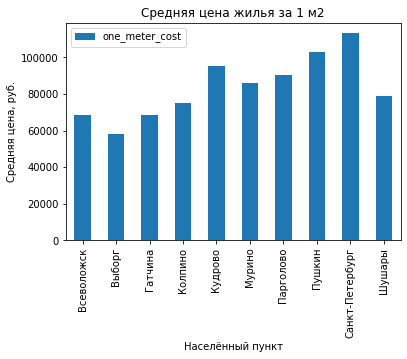

In [93]:
# построим гистограмму       
data.loc[data['locality_name'].isin(data['locality_name'].value_counts()[:10].index)] \
        .pivot_table(index='locality_name', values='one_meter_cost', aggfunc='mean') \
        .plot(kind='bar', title='Средняя цена жилья за 1 м2', xlabel='Населённый пункт', ylabel='Средняя цена, руб.')
plt.show()

In [94]:
# посмотрим цены с точностью до копейки
data.loc[data['locality_name'].isin(data['locality_name'].value_counts()[:10].index)] \
        .pivot_table(index='locality_name', values='one_meter_cost', aggfunc='mean') \
        .sort_values(by='one_meter_cost', ascending=False)

,one_meter_cost
locality_name,
Санкт-Петербург,113199.931332
Пушкин,102952.335230
Кудрово,95324.930544
Парголово,90332.263023
Мурино,86061.677014
Шушары,78677.364217
Колпино,75333.295801
Гатчина,68746.146763
Всеволожск,68703.119751


Самая дорогое жилье в Санкт-Петербурге - больше 110 тысяч рублей за м2. 

Самое дешевое жилье в данной выборке - в Выборге. Здесь квадратный метр обайдется почти в два раза дешевле, порядка 60 тысяч за м2.

#### Стоимость м2 за километр удаления от центра в Санкт-Петербурге

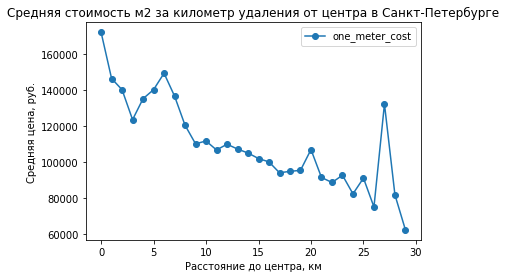

In [95]:
data.loc[data['locality_name'] == 'Санкт-Петербург'] \
        .pivot_table(index='cityCenters_nearest_km', values='one_meter_cost', aggfunc='mean') \
        .plot(kind='line', style='o-', title='Средняя стоимость м2 за километр удаления от центра в Санкт-Петербурге', \
              xlabel='Расстояние до центра, км', ylabel='Средняя цена, руб.')
plt.show()

Чем дальше от центра, тем дороже квадратный метр - ожидаемый результат. Однако на графике видно пару явных отклонений - в пяти километрах от центра - Васильевский остров, в 27 - Петергоф. Районы элитные, значит и цены должны им соответствовать. 

### Общий вывод

Целью нашего исследования является анализ данных Яндекс.Недвижимости по Санкт-Петербургу и Ленинградской области.

В результате исследования была проведена предобработка данных, в процессе которой были заполнены пустые значения, исправлены типы данных, устранены редкие и выбивающиеся значения (аномалии). Было удалено **0.78%** от исходных данных. Также добавлены новые столбцы.

Следующим шагом было изучение данных на предмет их влияния на стоимость недвижимости. Найдена скорость продажи квартир, определены факторы влияния на общую стоимость объекта. Рассчитали среднюю стоимость одного метра жилья для Санкт-Петербурга, которая составила **113199 руб./м2**. Самым доступным из популярных населённых пунктов оказался Выборг со стоимостью **58141 руб./м2**.

Изучена стоимость квадратного метра за километр удаления от центра Санкт-Петербурга. Чем дальше от центра, тем дешевле жилье, и, судя по данным, найдены два элитных района - Васильевский остров и Петергоф. 